In [1]:
import pandas as pd
from google.colab import files
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
uploaded = files.upload()

Saving attend.xls to attend (1).xls


In [ ]:
data = pd.read_excel('attend.xls')

In [ ]:
data.head()

,attend,termGPA,priGPA,ACT,final,atndrte,hwrte,frosh,soph,skipped,stndfnl
0,27,3.19,2.64,23,28,84.375,100,0,1,5,0.472689
1,22,2.73,3.52,25,26,68.750,87.5,0,0,10,0.052521
2,30,3.00,2.46,24,30,93.750,87.5,0,0,2,0.892857
3,31,2.04,2.61,20,27,96.875,100,0,1,1,0.262605
4,32,3.68,3.32,23,34,100.000,100,0,1,0,1.733193


In [ ]:
y =  data['termGPA']
X = data['attend']

In [ ]:
# Add a constant term to X
X = sm.add_constant(X)

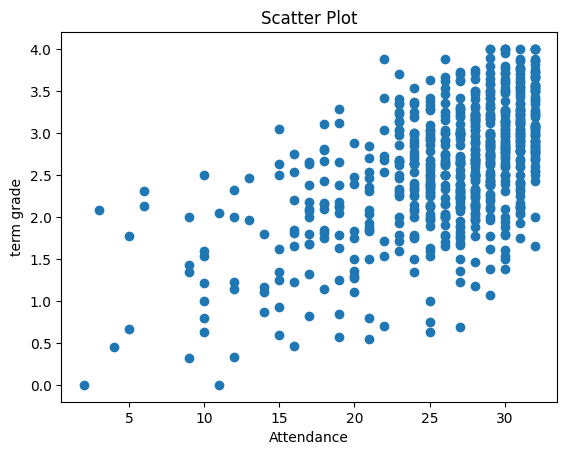

In [ ]:
# Create scatter plot
plt.scatter(X['attend'], y)

# Set labels and title
plt.xlabel('Attendance')
plt.ylabel('term grade')
plt.title('Scatter Plot')

# Display the plot
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [ ]:
data_size = len(X)

data_size * 0.7

475.99999999999994

In [ ]:
X_train

,const,attend
398,1.0,28
146,1.0,30
95,1.0,25
213,1.0,29
151,1.0,25
...,...,...
407,1.0,31
601,1.0,15
243,1.0,24
321,1.0,27


In [ ]:
X_test

,const,attend
604,1.0,31
218,1.0,32
421,1.0,32
233,1.0,32
275,1.0,24
...,...,...
596,1.0,15
266,1.0,31
18,1.0,31
82,1.0,30


In [ ]:
# Create a linear regression model
model = sm.OLS(y_train, X_train)

# Fit the model to the data
results = model.fit()

# Print the summary of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                termGPA   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     195.1
Date:                Tue, 16 May 2023   Prob (F-statistic):           2.21e-37
Time:                        18:43:49   Log-Likelihood:                -446.53
No. Observations:                 476   AIC:                             897.1
Df Residuals:                     474   BIC:                             905.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7347      0.136      5.411      0.0

In [ ]:
predictions = results.predict(sm.add_constant(X_test))

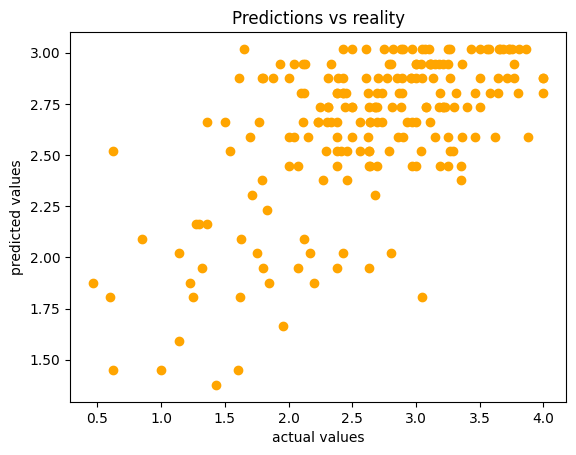

In [ ]:
# Create scatter plot
plt.scatter(y_test, predictions, color='orange')

# Set labels and title
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.title('Predictions vs reality')

# Display the plot
plt.show()

## Regression performance

In [ ]:
# mean square error
mse = sum((predictions - X_test)**2) / len(X_test)
mse

TypeError: ignored

In [ ]:
# root mean square error
rmse = np.sqrt(mse)
rmse

In [ ]:
# mean absolute error
mae = sum(np.abs(predictions - X_test)) / len(X_test)

In [ ]:
# mean absolute percentage error
mape = sum(np.abs((predictions - X_test)/X_test)) / len(X_test)
mape

In [ ]:
# important ideas
# 1. minimaze error
# 2. different errors penalize slightly different things
# 3. used to compare two models

In [ ]:
X_train_square = X_train ** 2
X_test_square = X_test ** 2

In [ ]:
# Add a constant term to X
X_train_cons_square = sm.add_constant(X_train_square)

# Create a linear regression model
model_square = sm.OLS(y_train, X_train_cons_square)

# Fit the model to the data
results_square = model_square.fit()

# Predictions
predictions_square = results_square.predict(X_test_square)

In [ ]:
mse_square = sum((predictions_square - X_test_square)**2) / len(X_test)
mse_square

In [ ]:
mse_square = sum((predictions - X_test)**2) / len(X_test)
mse_square

In [ ]:
rmse_square = np.sqrt(mse)
rmse_square